In [1]:
from Functions import *

Sample start date:  2005-03-16 19:12:30 
Sample end date: 2005-03-21 00:00:30
['2005-03-16 22:05:30', '2005-03-17 01:53:30', '2005-03-17 08:31:30', '2005-03-18 23:08:30', '2005-03-19 02:37:30', '2005-03-19 08:21:30', '2005-03-20 02:11:30', '2005-03-20 08:16:30', '2005-03-20 09:22:30', '2005-03-20 14:39:30', '2005-03-20 17:24:30']


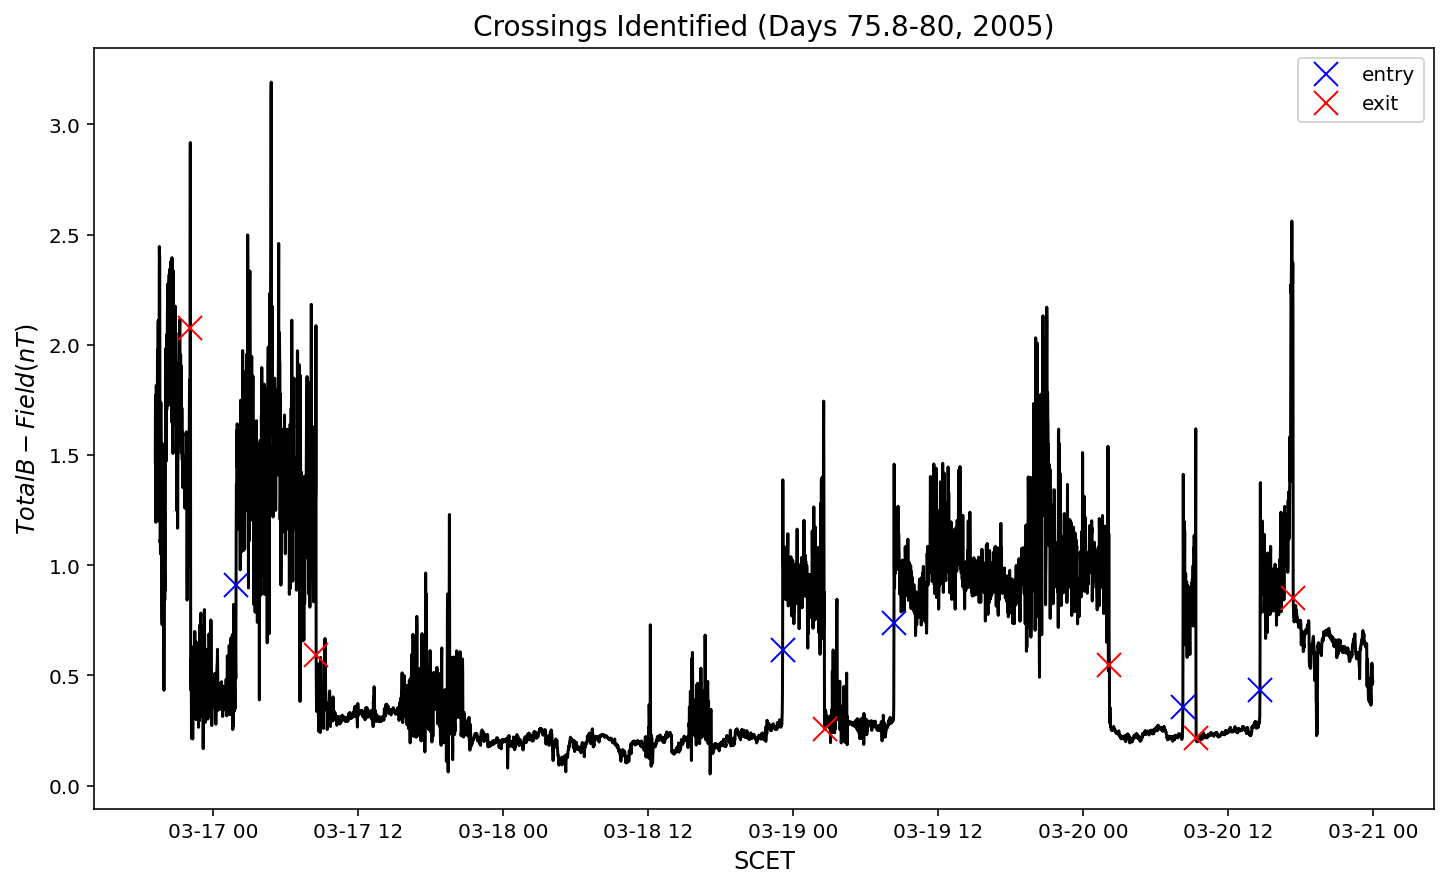

In [2]:
windowsize = 7
estimatedNumCrossings = 9
year = 2005
start_day1 = 75.8
end_day1 = 80
day_data1 = get_day_data(start_day1, end_day1, year)
# plot_KSM(day_data1, year, 75, end_day1, xFormat = "Hour")
entries1, exits1, ax1, ksmcoords_2_1,cross_array1= identify_crossings_2(day_data1, windowsize, estimatedNumCrossings,3,2,200)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day1, end_day1,year),fontsize = 14)
print(cross_array1)

Sample start date:  2005-03-25 00:00:30 
Sample end date: 2005-03-27 09:22:30
['2005-03-25 05:19:30', '2005-03-25 13:34:30', '2005-03-26 22:53:30', '2005-03-27 00:14:30', '2005-03-27 02:39:30', '2005-03-27 05:24:30', '2005-03-27 07:08:30', '2005-03-27 09:02:30']


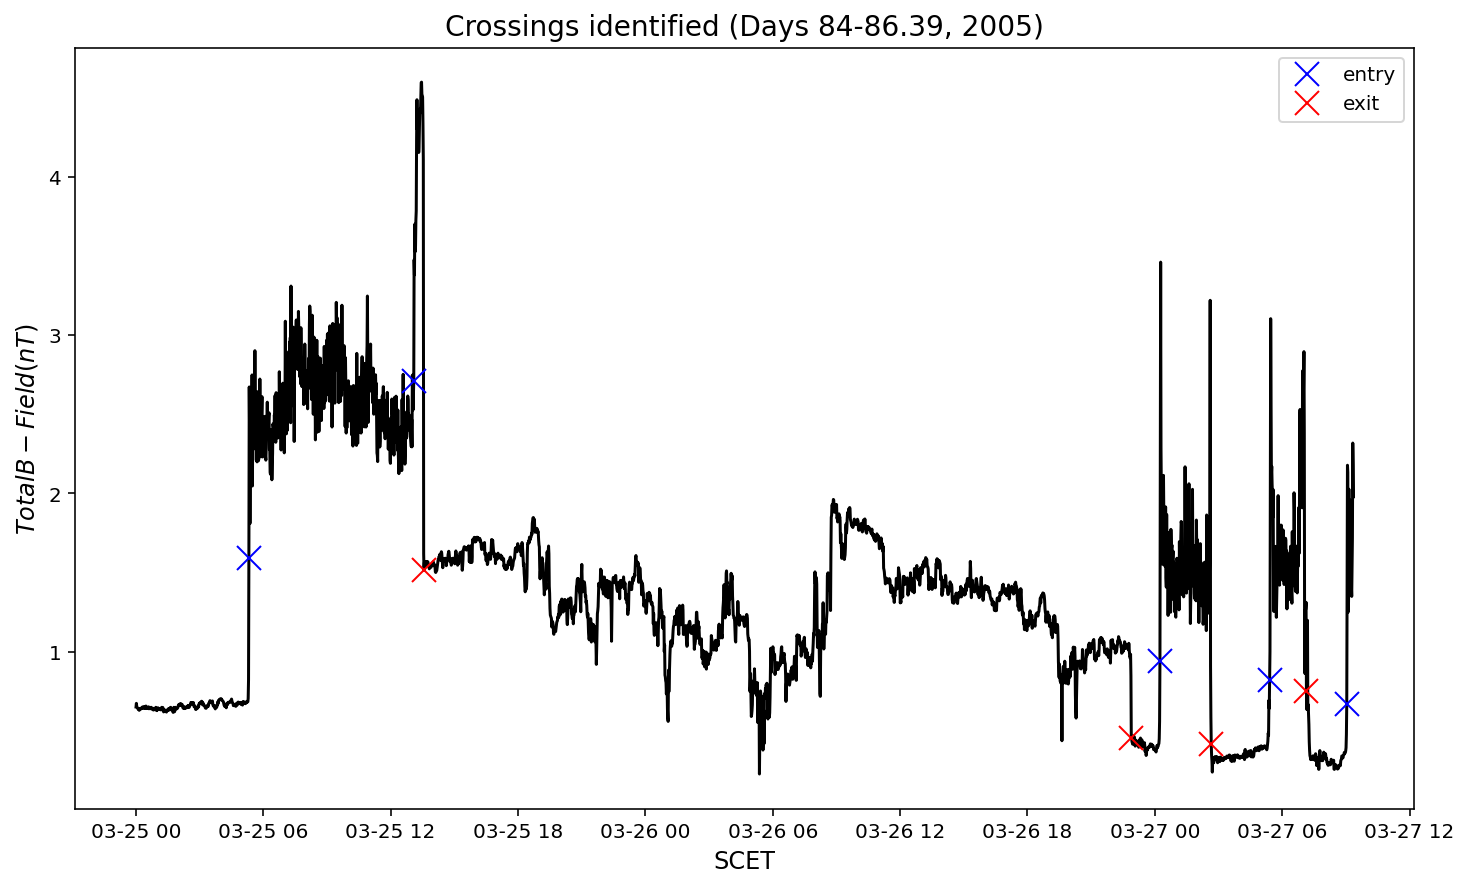

In [3]:

windowsize = 7
estimatedNumCrossings = 9
year = 2005
start_day2 = 84
end_day2 = 86.39
day_data2 = get_day_data(start_day2, end_day2, year)
# plot_KSM(day_data2, year, start_day2, 87, xFormat = "Hour")
entries2, exits2, ax2, ksmcoords_2_2,cross_array2= identify_crossings_2(day_data2, windowsize, estimatedNumCrossings,3,2,200)
plt.title("Crossings identified (Days {}-{}, {})".format(start_day2, end_day2,year), fontsize = 14)

del cross_array2[1]
print(cross_array2)

In [4]:

cross_array_total = cross_array1+cross_array2
print(cross_array_total)
print(len(cross_array_total))

['2005-03-16 22:05:30', '2005-03-17 01:53:30', '2005-03-17 08:31:30', '2005-03-18 23:08:30', '2005-03-19 02:37:30', '2005-03-19 08:21:30', '2005-03-20 02:11:30', '2005-03-20 08:16:30', '2005-03-20 09:22:30', '2005-03-20 14:39:30', '2005-03-20 17:24:30', '2005-03-25 05:19:30', '2005-03-25 13:34:30', '2005-03-26 22:53:30', '2005-03-27 00:14:30', '2005-03-27 02:39:30', '2005-03-27 05:24:30', '2005-03-27 07:08:30', '2005-03-27 09:02:30']
19


In [5]:
day_data = get_day_data(start_day1,end_day2, 2005)

Sample start date:  2005-03-16 19:12:30 
Sample end date: 2005-03-27 09:22:30


In [6]:
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array_total, day_data, mins,offset)

type1 = ['exit','entry', 'exit', 'entry', 'exit' ,'entry', 'exit','entry', 'exit', 'entry', 'exit' ,
         'entry', 'exit','exit','entry', 'exit','entry', 'exit','entry']
num = np.arange(1, len(cross_array_total)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)

S=1 θ_BN value = 40.97646800502015
Standard deviation = 20.031445920143973
S=2 θ_BN value = 23.21736255781341
Standard deviation = 16.98789579645452
S=3 θ_BN value = 23.666285319221373
Standard deviation = 14.887953966957106
S=4 θ_BN value = 44.00166854015317
Standard deviation = 5.686882900736981
S=5 θ_BN value = 26.174459393479303
Standard deviation = 18.79600017956738
S=6 θ_BN value = 52.143108106273786
Standard deviation = 5.615585454954101
S=7 θ_BN value = 54.04668680223635
Standard deviation = 20.177412009522786
S=8 θ_BN value = 58.16105669421869
Standard deviation = 12.555095067964645
S=9 θ_BN value = 74.46522964342131
Standard deviation = 9.797442376937308
S=10 θ_BN value = 55.417558986827366
Standard deviation = 13.187890287129605
S=11 θ_BN value = 57.0804209930376
Standard deviation = 8.380600152581893
S=12 θ_BN value = 72.81848931706739
Standard deviation = 6.176540050282009
S=13 θ_BN value = 64.03182491270431
Standard deviation = 5.3441353802950795
S=14 θ_BN value = 68.4760

Text(0, 0.5, 'Skewness of ${\\Theta}_{BN}$')

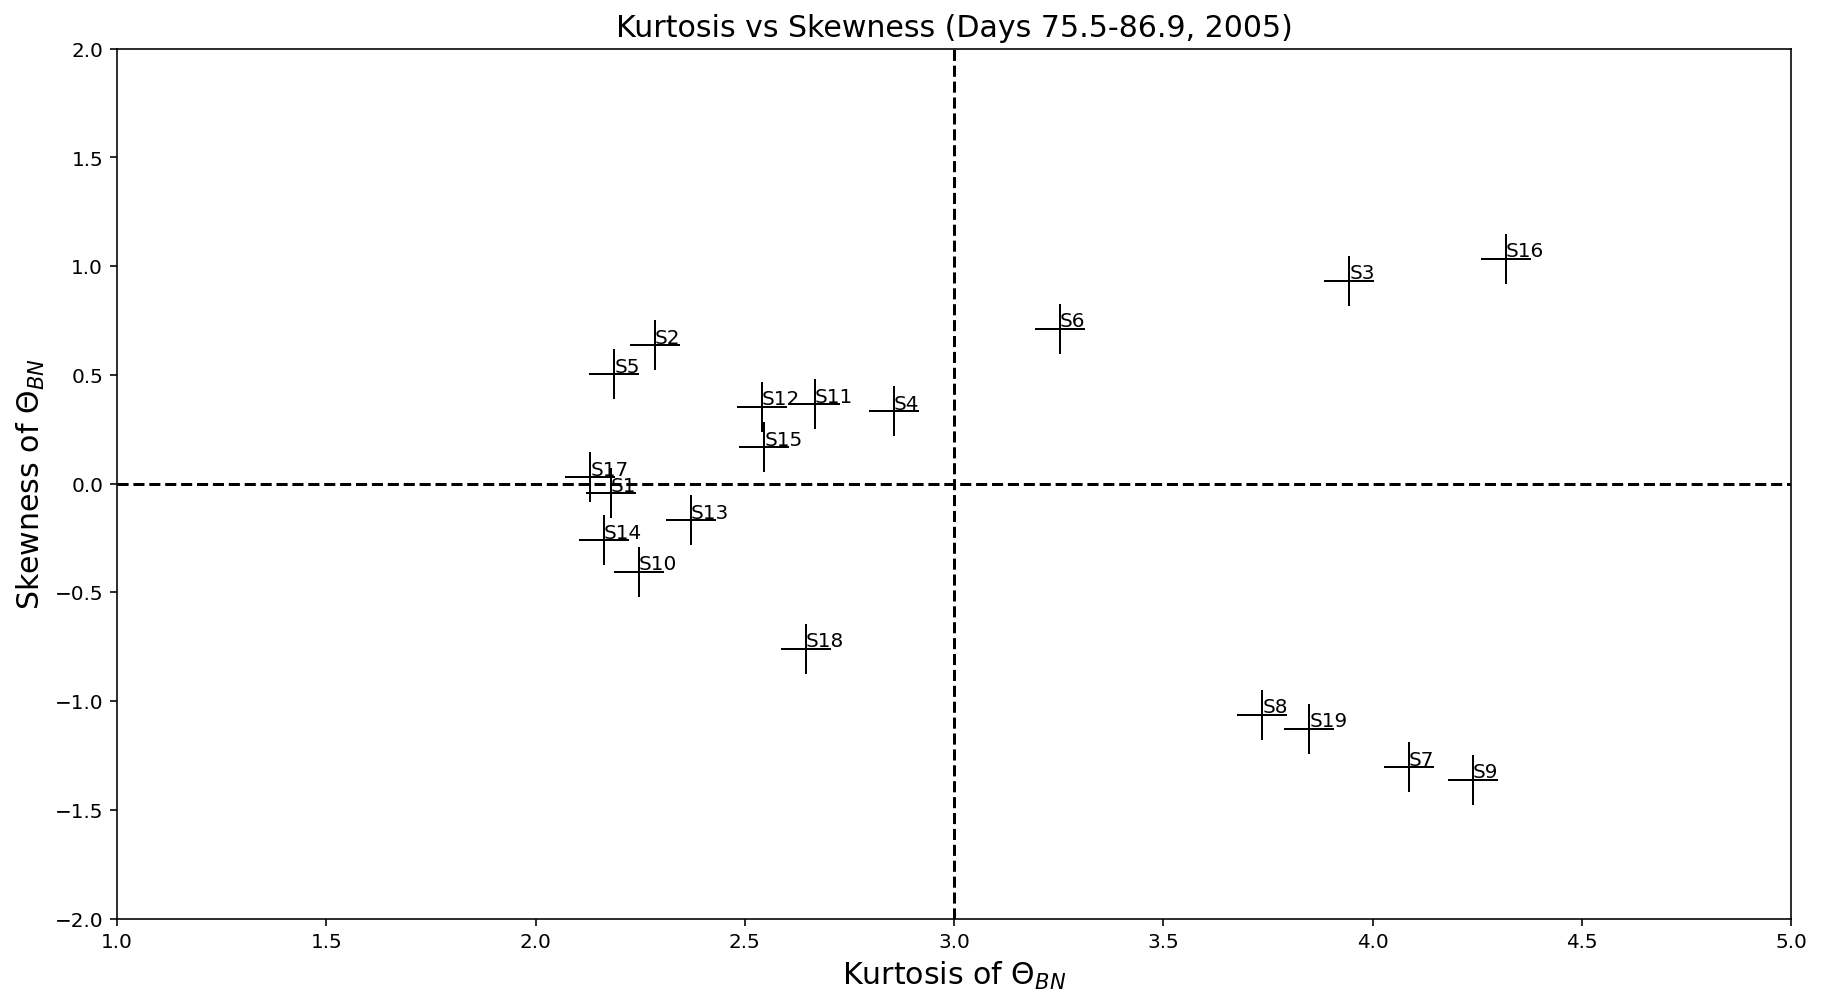

In [7]:
Plot_Dist_for_theta([*shock_v])
plt.title("Kurtosis vs Skewness (Days 75.5-86.9, 2005)", fontsize = 15)
plt.xlabel("Kurtosis of ${\Theta}_{BN}$", fontsize = 15)
plt.ylabel("Skewness of ${\Theta}_{BN}$", fontsize = 15)

In [8]:
def plotncp(day_data,cross_array,scal,ave_ncp,std_ncp,point1,point2):
    plt.figure(figsize=(10,12))
    a=[]
    b=[]
    c=[]

    #x.invert_yaxis()
    #ax.plot(day_data['X'],day_data['Rs'],color='k',label='orbit path')
    for i in range(len(cross_array)):
        X=day_data.loc[cross_array[i],'X']
        RHO=day_data.loc[cross_array[i],'Rs']
        Y=day_data.loc[cross_array[i],'Y']
        Z=day_data.loc[cross_array[i],'Z']
        plt.plot(X,RHO,'o',color='k')
        S='S'+str(i+1)
        plt.annotate(S, (X-1.8,RHO ))
        x_ncp=ave_ncp[i][0]
        y_ncp=ave_ncp[i][1]
        z_ncp=ave_ncp[i][2]
        sx_ncp=std_ncp[i][0]
        sy_ncp=std_ncp[i][1]
        sz_ncp=std_ncp[i][2]
        
        dot=[Y,Z]/RHO
        rho_ncp=np.dot([y_ncp,z_ncp],dot)
        srho_ncp=np.dot([sy_ncp,sz_ncp],dot)
        errorr=srho_ncp*scal
        errorx=sx_ncp*scal
        plt.plot(X,RHO,'o',color='k')
        if (x_ncp*scal)>=0:
            plt.plot([X,X+(x_ncp*scal)],[RHO,RHO+(rho_ncp*scal)],color='k')
            plt.errorbar(X+(x_ncp*scal),RHO+(rho_ncp*scal),xerr=errorx,yerr=errorr,color='k')
        else:
            plt.plot([X,X+(x_ncp*-scal)],[RHO,RHO+(rho_ncp*-scal)],color='k')
            plt.errorbar(X+(x_ncp*-scal),RHO+(rho_ncp*-scal),xerr=errorx,yerr=errorr,color='k')
        
        a.append(x_ncp)
        b.append(rho_ncp)
        c.append(srho_ncp)
    #ax.legend()
    
    
    plt.gca().invert_yaxis
    plotcross(day_data,cross_array,point1,point2,ave_ncp,std_ncp)
    return a,b,c

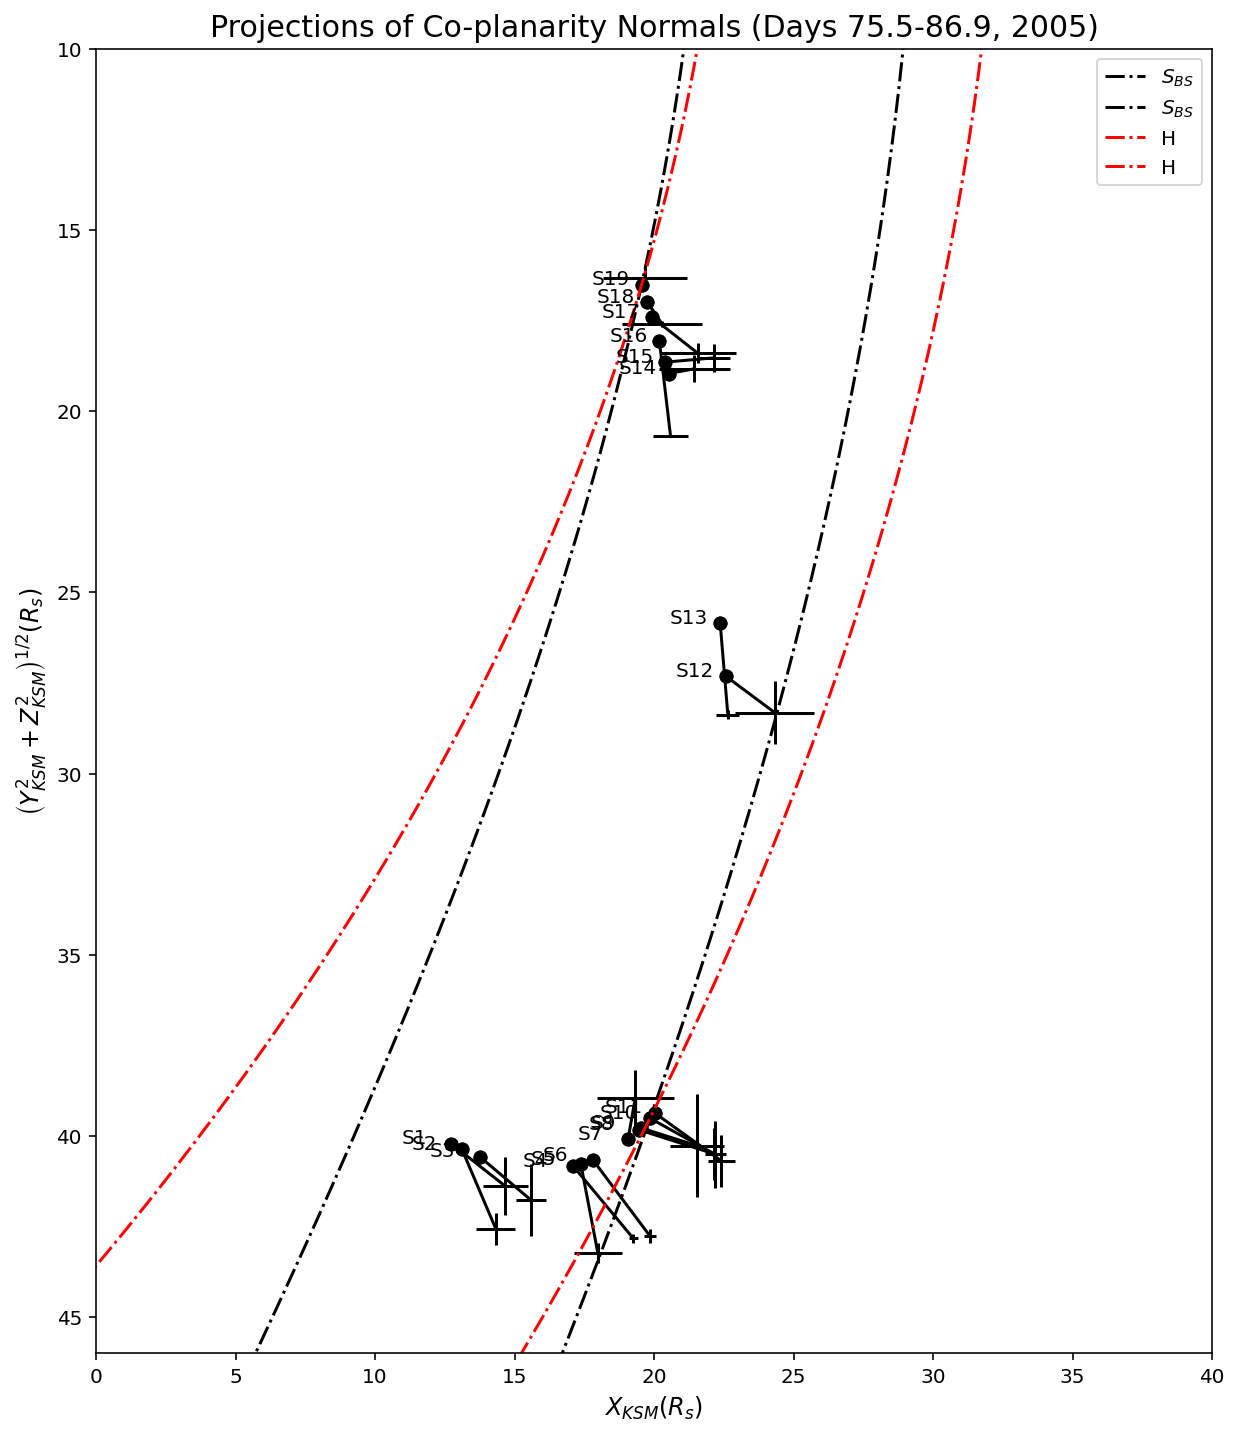

In [9]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data,cross_array_total,-3,ave_ncp,std_ncp,10,0)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title("Projections of Co-planarity Normals (Days 75.5-86.9, 2005)", fontsize = 15)
plt.ylim(10,46)
plt.xlim(0,40)
plt.gca().invert_yaxis()

Theta_CPM  [6.817138646164267, 23.30661507691299, 4.265317224540141, 7.586502332593639, 40.99889996476003, 11.022084673241594, 68.99687137686752, 19.60595395009115, 19.67941009981186, 10.046934932409755, 3.978576090747623, 3.4974285520142274, 58.15218361608865, 30.376422284338986, 25.9990936280453, 59.49863569878471, 9.705289244848117, 27.48510201819775, 79.43345349372825]
Std [15.944585158436686, 12.902693150185053, 17.172463794389973, 2.659788419344932, 17.51551597365724, 3.793912454525078, 31.017598590728674, 14.506426510822536, 29.966068116834354, 17.41876331485108, 13.194116617652684, 19.030156680754573, 8.432808237940655, 12.10296538871862, 8.760430172480083, 12.579235994966867, 12.028306677077072, 17.88624224252356, 20.3571624656747]


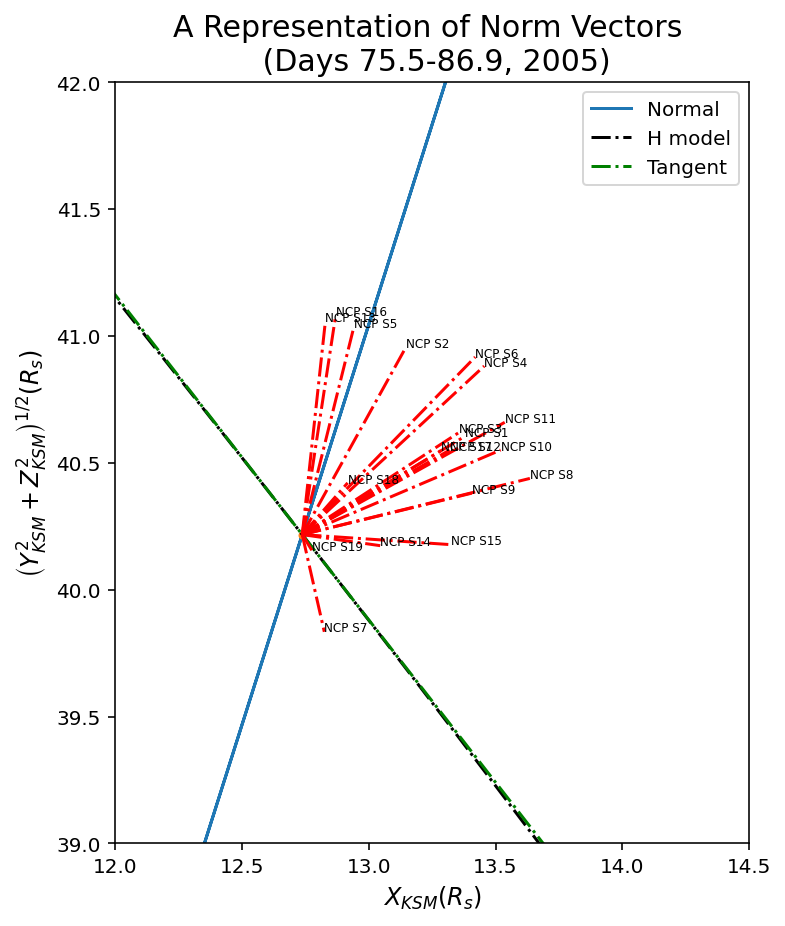

In [10]:
t,st=calCPM(day_data,cross_array_total,ave_ncp,rho_ncp,std_ncp,srho_ncp)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title('A Representation of Norm Vectors \n (Days 75.5-86.9, 2005)',fontsize = 15)
plt.ylim(39,42)
plt.xlim(12,14.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

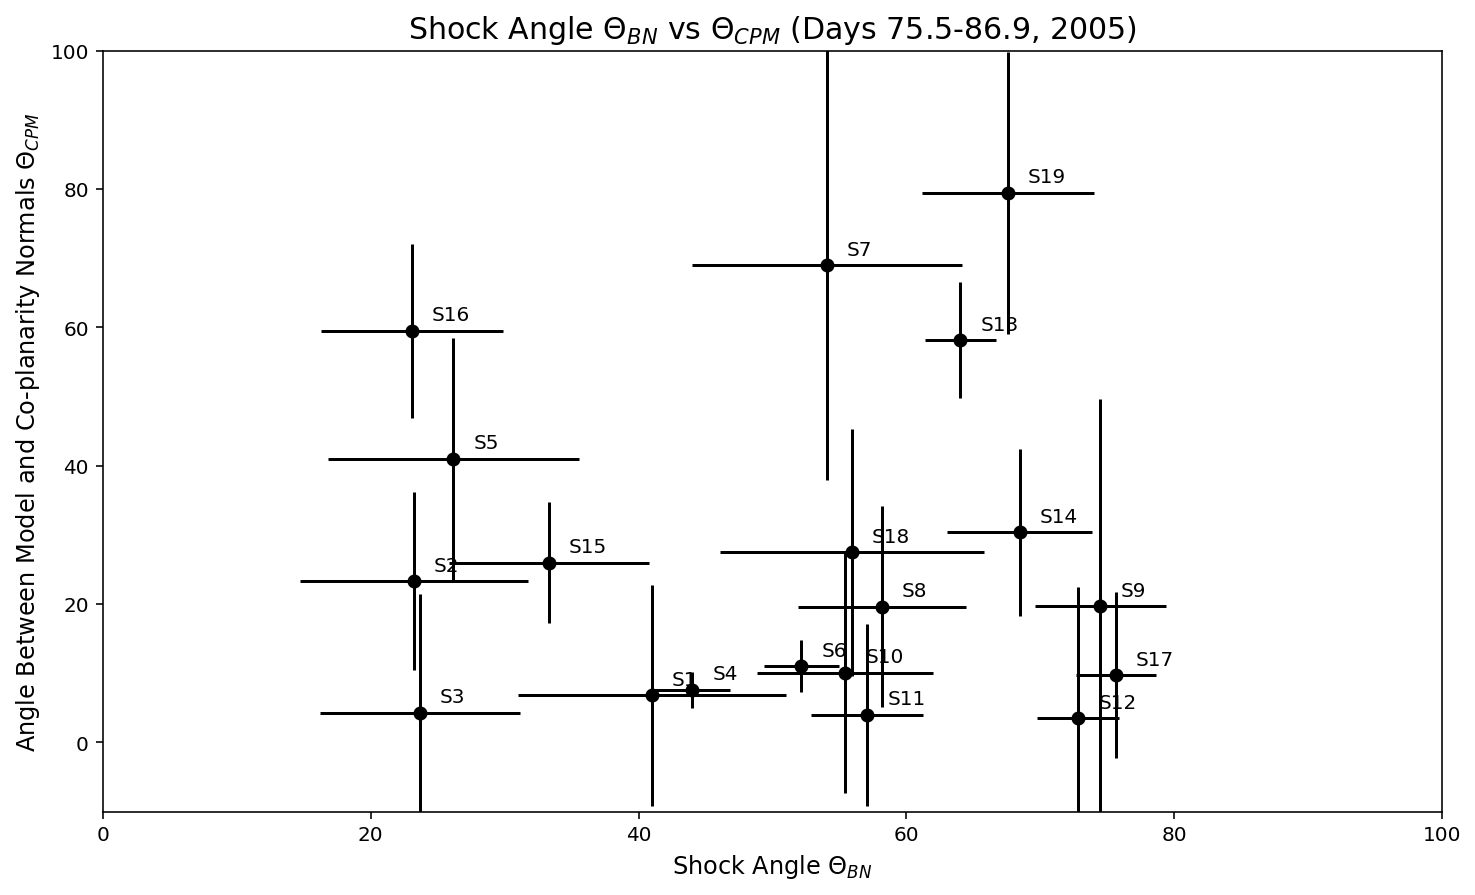

In [11]:
plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('Shock Angle ${\Theta}_{BN}$',fontsize = 12)
plt.ylabel('Angle Between Model and Co-planarity Normals ${\Theta}_{CPM}$ ',fontsize = 12)
plt.title('Shock Angle ${\Theta}_{BN}$ vs ${\Theta}_{CPM}$ (Days 75.5-86.9, 2005)',fontsize = 15)

plt.errorbar(ave_shock,t,xerr=std/2,yerr=st,fmt='o',color='k')
plt.ylim(-10,100)
plt.xlim(0,100 )
for i in range(len(srho_ncp)):
    S='S'+str(i+1)
    plt.annotate(S, (ave_shock[i]+1.5,t[i]+1.5) )